In [1]:
# Dependencies
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
# Create 2000-2019 dataframe
spotify_2000_2019_df = pd.read_csv("Resources/spotify_from_2000-2019.csv")

# Display sample data
spotify_2000_2019_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
#Create Df of songs with popularity over 50
popular_df = pd.DataFrame(spotify_2000_2019_df.loc[spotify_2000_2019_df['popularity']>=50,:])

# Display popular data
popular_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [4]:
def scatterandhist(population, sample):
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="Full Data Popularity")
    plt.scatter(range(len(sample)), sample, label="Popular Songs Popularity")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="Full Data Popularity")
    plt.hist(sample, 20, density=True, alpha=0.7, label="Popular Songs Popularity")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

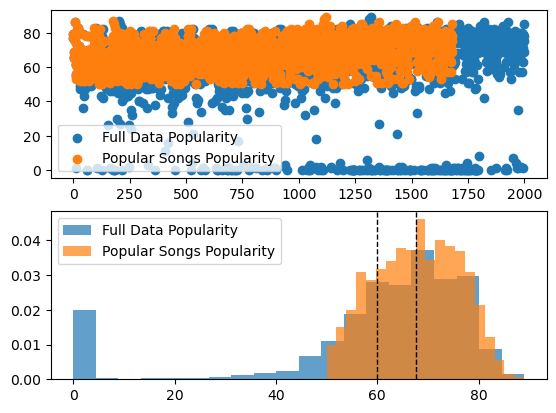

In [5]:
popular_population, popular_sample = scatterandhist(spotify_2000_2019_df['popularity'],popular_df['popularity'])
plt.savefig('Output/popular_songs_statistics_subdataset.png')

In [6]:
# Get the population mean.
stats.ttest_1samp(popular_sample, popular_population.mean())

TtestResult(statistic=37.87451984175559, pvalue=1.876245645341364e-227, df=1680)

In [7]:
losers = pd.DataFrame(spotify_2000_2019_df.loc[(spotify_2000_2019_df["popularity"]< 10) & (spotify_2000_2019_df["popularity"] >= 0), :])
losers

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.0328,0.048200,0.3600,0.808,139.066,pop
59,Oasis,Go Let It Out,278666,False,2000,0,0.408,0.849,2,-5.631,1,0.0333,0.0136,0.000025,0.5600,0.628,84.192,"Folk/Acoustic, rock"
62,Mariah Carey,Against All Odds (Take A Look at Me Now) (feat...,199480,False,2011,0,0.471,0.514,1,-5.599,1,0.0315,0.5840,0.000000,0.1030,0.373,117.338,"pop, R&B"
105,Nelly Furtado,I'm Like A Bird,243160,False,2000,1,0.622,0.608,10,-5.085,1,0.0360,0.1380,0.000005,0.2730,0.607,89.661,"hip hop, pop, latin"
126,Jennifer Lopez,Ain't It Funny,246160,False,2001,0,0.707,0.869,5,-4.525,0,0.0481,0.1040,0.000121,0.0813,0.621,99.825,"hip hop, pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Ava Max,So Am I,183026,False,2019,4,0.682,0.656,6,-4.670,1,0.0435,0.0737,0.000000,0.3530,0.607,130.089,pop
1966,Blueface,Thotiana,129264,True,2018,1,0.906,0.382,10,-12.890,0,0.2690,0.1800,0.000000,0.1130,0.391,104.025,hip hop
1973,5 Seconds of Summer,Easier,157492,False,2019,1,0.505,0.428,5,-5.604,1,0.2210,0.4890,0.000000,0.0977,0.618,175.813,pop
1986,Lauv,i'm so tired...,162582,False,2019,2,0.599,0.733,11,-7.058,1,0.2030,0.1760,0.000000,0.2420,0.534,102.211,"pop, Dance/Electronic"


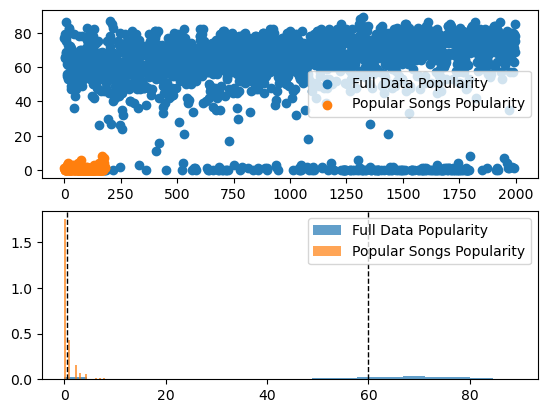

In [8]:
losers_population, losers_sample = scatterandhist(spotify_2000_2019_df['popularity'],losers['popularity'])
plt.savefig('Output/loser_songs_statistics_subdataset.png')

In [9]:
stats.ttest_1samp(losers_sample, losers_population.mean())

TtestResult(statistic=-645.5848613873546, pvalue=2.5527473836321144e-303, df=179)